#Ejercicios para Notebook 2

Les dejamos unos ejercicios para poner en práctica lo que charlamos en el Notebook 2. Deben completa los espacios vacíos (marcados con guión bajo _____) con el código que haga falta para obtener un resultado.

- Importar un Dataset
- Plot de conteo, histogramas, kernel density estimation (KDE) y boxplots comparativos
- Calcular intervalos de confianza
- Test ANOVA 
- Introducción a la generacióón de números aleatorios

#Importar el dataset de vinos tintos y de vinos blancos

Importe los siguientes datasets, con los nombres corerspondientes utilizando la función pd.read
https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv (df_red) and https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv" (df_white).

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df_red =pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", delimiter=";")
df_white =pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", delimiter=";")

Podemos contar cuántos datos hay en nuestro DataFrame para cada calidad. Visualice el código utilizado para los vinos tintos y repítalo para los blancos *sns.countplot* 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


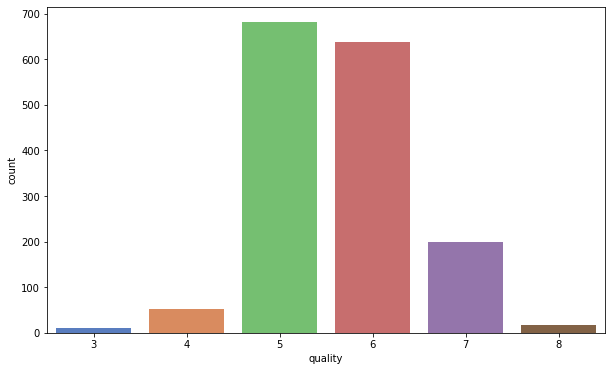

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(df_red["quality"], palette="muted")

#Realícelo para vinos blancos
sns.countplot(_____, palette="muted")

Una buena forma de comparar los datos de una categoria es realizando boxplots paralelos.
Hacer un boxplot comparativo (usando **sns.boxplot**) entre vino tinto y blanco con las categorías "pH" y "alcohol".

TIP: No olvides utilizar **pd.concat** para tener los datos en un único DataFrame.

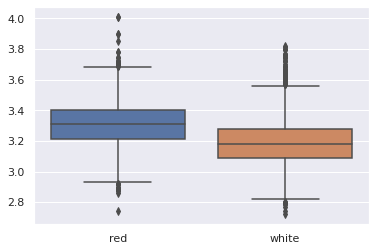

In [ ]:
df_pH = pd.concat([df_red["pH"],df_white["pH"]], ignore_index=True, axis=1)
df_pH.columns = ['red', 'white']
sns.boxplot(data=df_pH)

In [ ]:
df_alc = pd._____([df_red["______"],df_white["___"]], ignore_index=True, axis=1)
df_alc.columns = ['red', 'white']
sns.boxplot(data=df_pH)

##Intervalo de confianza

En el Notebook 2 calculamos el intervalo de confianza para la categoría alcohol. Ahora, lo calcularemos para la "Fixed acidity" de los vinos blancos (df2) cuya calidad sea 3.

In [ ]:
import numpy as np

df_quality3_fixedacidity=df2[df_white['quality'] == 3]['fixed acidity']
mean = np.mean(df_quality3_fixedacidity)
N = np.size(df_quality3_fixedacidity)
SD = np.std(df_quality3_fixedacidity)
SE = SD /np.sqrt(N)

print("mean: %.2f N: %.2f Standard Error: %.2f" % (mean, N, SE))

mean: 7.60 N: 20.00 Standard Error: 0.38


Ahora calculemos los limites superior e inferior del intervalo

In [ ]:
#La media se almacena en la varaible mean y el error estandar en la variable SE

lower_limit = _____-1.96*_____
upper_limit = _____+1.96*_____

print("lower limit: \t%.2f \nmean: \t\t%.2f \nupper limit: \t%.2f" % (lower_limit, mean, upper_limit))

lower limit: 	6.86 
mean: 		7.60 
upper limit: 	8.34


Obtenemos la media del pH de ambos tipos de vinos

In [ ]:
print(df_pH.mean())

red      3.311113
white    3.188267
dtype: float64


#ANOVA

Para el siguiente ejercicio, tendremos que comparar la media del contenido de "sulphates" de cada calidad de vinos tintos y blancos con un test ANOVA, al igual que lo hicimos con "residual sugar" en el Notebook 2. Primero, recomendamos utilizar el método **groupby** para resumir las medias de todos los grupos


In [ ]:
df_red.groupby(["quality"])["sulphates"].describe()

,count,mean,std,min,25%,50%,75%,max
quality,,,,,,,,
3,10.0,0.570000,0.122020,0.40,0.5125,0.545,0.615,0.86
4,53.0,0.596415,0.239391,0.33,0.4900,0.560,0.600,2.00
5,681.0,0.620969,0.171062,0.37,0.5300,0.580,0.660,1.98
6,638.0,0.675329,0.158650,0.40,0.5800,0.640,0.750,1.95
7,199.0,0.741256,0.135639,0.39,0.6500,0.740,0.830,1.36
8,18.0,0.767778,0.115379,0.63,0.6900,0.740,0.820,1.10


In [ ]:
df_white.groupby(["quality"])["sulphates"].describe()

,count,mean,std,min,25%,50%,75%,max
quality,,,,,,,,
3,20.0,0.474500,0.119845,0.28,0.38,0.44,0.5425,0.74
4,163.0,0.476135,0.117973,0.25,0.38,0.47,0.5400,0.87
5,1457.0,0.482203,0.098205,0.27,0.42,0.47,0.5300,0.88
6,2198.0,0.491106,0.113357,0.23,0.41,0.48,0.5500,1.06
7,880.0,0.503102,0.130195,0.22,0.41,0.48,0.5800,1.08
8,175.0,0.486229,0.147073,0.25,0.38,0.46,0.5850,0.95
9,5.0,0.466000,0.092628,0.36,0.42,0.46,0.4800,0.61


Ahora realicemos el test ANOVA. Qué resultados esperan?
Recordar que un alto *p-valor* (>0.025, llamado en este test "p-unc") indica que la media de "sulphates" es la misma en todas las categorias de vinos analizadas.
Primero debemos instalar la libreria *pingouin* e importarla.

In [ ]:
!pip install ______
import _______ as pg

     |████████████████████████████████| 225kB 11.6MB/s 
  Created wheel for pingouin: filename=pingouin-0.3.8-cp36-none-any.whl size=221687 sha256=92023fd6265958fab132e1f4b523cbabc1e7178861bd5f42bb6a68785bc6b136
  Stored in directory: /root/.cache/pip/wheels/d6/9e/53/f885f73f29cf7c8cac3d8f4b1532bbfef2f5eb543946ac9055
  Created wheel for outdated: filename=outdated-0.2.0-cp36-none-any.whl size=4961 sha256=7bbf89102125e3961c7bb049ab2c544f9a1b3098959dcb69dafe089a1bf946cb
  Stored in directory: /root/.cache/pip/wheels/fd/7c/ef/814f514d31197310872b5abf353feb8fef9d67ee658e1e7e39
  Created wheel for littleutils: filename=littleutils-0.2.2-cp36-none-any.whl size=7051 sha256=49697c41248f3a0cc81e9cd28438b1f96952d9c57f95cdfd340ce1f2338bd089
  Stored in directory: /root/.cache/pip/wheels/53/16/9f/ac67d15c40243754fd73f620e1b9b6dedc20492ecc19a2bae1
Successfully built pingouin outdated littleutils


In [ ]:
df_red.anova(dv="sulphates", between="quality")

,Source,ddof1,ddof2,F,p-unc,np2
0,quality,5,1593,22.273376,1.225890e-21,0.065342


In [ ]:
df_white.anova(dv="sulphates", between="quality")

,Source,ddof1,ddof2,F,p-unc,np2
0,quality,6,4891,3.642317,0.001308,0.004448


Cómo interpreta estos resultados en los vinos tintos y en los blancos?



---
#Ejercicios Avanzados / de Investigación


---







Queremos hacer histogramas de todas las categorías y mostrarlas como una matriz.
Complete el código parar repetir los histogramas de las categorias de vino blanco, utilizando color azul.


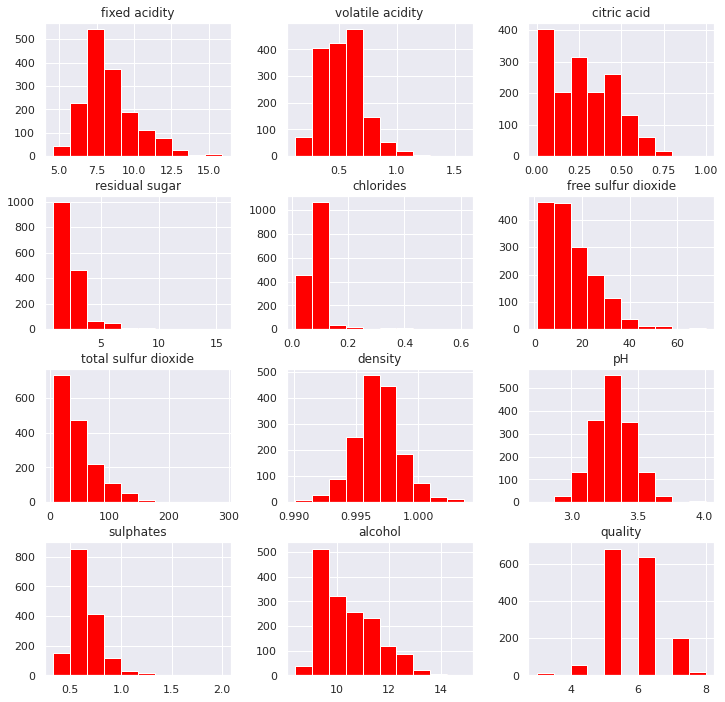

In [ ]:
sns.set()
df_red.hist(figsize=(12,12), color='red')
plt.show()

#Repetir para vino blanco en color azul
_____.hist(figsize=(12,12), color='____')
plt.show()

Queremos ver el histograma de la variable "alcohol" con un grááfico de KDE. Los histogramas y la KDE pueden combinarse usando **sns.distplot(*dataset*.*category*, kde=true)**. Vea el ejemplo del vino tinto y repítalo con el vino blanco.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


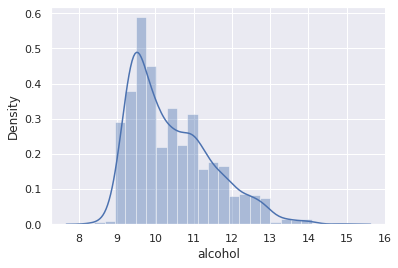

In [ ]:
sns.distplot(df_red.alcohol, kde=True)

In [ ]:
sns.distplot(____.alcohol, kde=____)

#Usar la función de generación de números aleatorios

El módulo **random** de las librerias estándar de Python incuyen un set de funciones que permiten obtener números aleatorios -o pseudo-aleatorios, para ser estrictos- de distintas distribuciones.

(Por qué son números pseudo-aleatorios y no aleatorios? https://pybonacci.org/2013/01/11/numeros-aleatorios-en-python-con-numpy-y-scipy/)





La función **np.random.randint (low, high = None, size = None, dtype = int)**
Devuelve números enteros desde *low* (inclusive) hasta *high* (no inclusive).

Si no especificamos el parametro *High*, los números se muestrean en el intervalo [0, low). 

Usen la funcióón mencionada para obtener un *array* de 10 elementos enteros muestreados aleatoriamente, que sean únicamente 0 o 1.

Obs: En Python se comienza a contar desde cero.

In [ ]:
np.random.randint(low=_____, size=_____)

array([0, 1, 0, 1, 1, 1, 1, 0, 1, 1])

obs: Cada vez que ejecutamos la celda los valores cambian, pero siempre respetan los parámetros requeridos (low, high, size)

Utilizando la misma función, obtener una matriz de 2x4 donde cada elemento sea un entero entre 0 y 4.
Help: to build a 2x4 matrix use size = (i, j), where i: row, j: column

In [ ]:
np.random.randint(low=____, size=(2, 4)) #size=(2,4) aclara que la matriz tiene que ser de dos filas y cuatro columnas.

array([[0, 0, 4, 1],
       [4, 3, 4, 1]])

Otra función útil es **numpy.random.(nombre_de_distribución)** que genera números aleatorios de la distribución requerida.

Por ejemplo, con la función **np.random.poisson(lambda=None, size=None)**
 , podemos tener muestras obtenidas de una distribución Poisson. Los parámetros de la distribución suelen indicarse entre paréntesis.

In [ ]:
np.random.poisson(2.5, 5)  

array([2, 2, 0, 0, 3])

Pruebe lo mismo utilizando la distribución binomial *numpy.random.binomial(n, p, size=None)* con n=10, p=0.5 y size=30


In [ ]:
np.random._______(10, 0.5, 30)

array([5, 7, 4, 7, 6, 5, 5, 5, 3, 3, 5, 2, 7, 6, 3, 7, 4, 7, 6, 4, 6, 2,
       6, 4, 7, 5, 5, 4, 6, 3])

Utilizaremos la libreria matplotlib para graficar. La importaremos.

Crearemos un histograma con datos muestreados de una distribución normal **np.random.normal(mu,sigma,size)**. Utilicen un valor de media 0, sigma 0.2 y tamaño de muestra igual a 1000. 

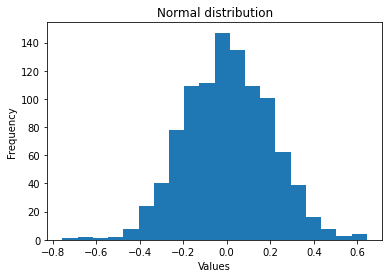

In [ ]:
import matplotlib.pyplot as plt

# we generate the data
datos = np.random.normal(mu=___,sigma=___,size=1000)

# histogram of normal distribution
plt.hist(datos, 20)
plt.ylabel('Frecuencia')
plt.xlabel('Valor')
plt.title('Distribución normal')
plt.show()

Prueben haciéndolo con una distribución Poisson con parámetro lambda igual a 2.5.
Ayuda: Usar la función **np.random.poisson(lambda, size)**

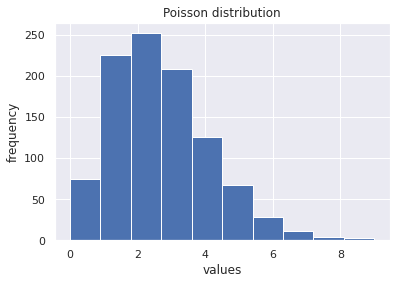

In [ ]:
import matplotlib.pyplot as plt

# we generate the data
lambd = 2.5 # lambda parameter of Poisson distribution
size = 1000 # amount of random numbers sampled from the distribution
datos = np.random.poisson(lambd, size)  #creating sample data

# histogram of poisson distribution sampled data
plt.hist(datos, 10)
plt.ylabel('Frecuencia')
plt.xlabel('Valor')
plt.title('Distribución Poisson')
plt.show()

#Ejercicio extra: Teorema central del Límite

Hagamos histogramas con muestras de tamaño 1000 provenientes de las distribuciones Binomial, Exponencial, Poisson y Geométrica. Utilicemos los parámetros _p_ = 0.9  y _n_ = 1 (binomial), _lambda_ = 1.0 (poisson), _scale_ = 2.0 (exponencial) y un _q_ = 0.5 (geometrica). 
Inténtelo nuevamente con muestras que van incrementando su tamaño entre 1 y 20000. Luego, grafiquen las medias en un histograma para cada tipo de distribución (les dejamos un código para completar). Para esto deberán usar un **ciclo for** (`for i in range(1,20000)`) y crear una lista para almacenar los valores de *mean* a medida que crece la muestra. Para armar una grilla de gráficos, utilicen el método _subplot_ de la libreria matplotlib.

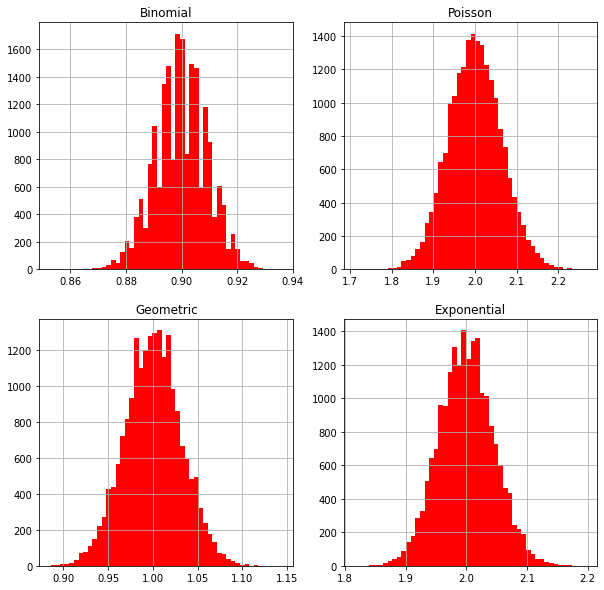

In [ ]:
# Ejemplo teorema del límite central
import pandas as pd

muestra_binomial = []
muestra_exp = []
muestra_poisson = []
muestra_geometric = []
p = 0.9
lam = 1.0
size = 1000

#con esta linea comenzamos el ciclo. Para cada "vuelta" de ese ciclo, se 
#repetirán todos los comandos que empiecen con la indentación o tabulación.
for i in range(1,20000):
    muestra = np.random.binomial(1, p, size=size)
    muestra_binomial.append(muestra.mean())
    muestra = np.random.exponential(scale=2.0,size=size)
    muestra_exp.append(muestra.mean())
    muestra = np.random.geometric(q=.5, size=size)
    muestra_geometric.append(muestra.mean())
    muestra = np.random.poisson (lam=lam, size=size)
    muestra_poisson.append(muestra.mean()) 

#en el siguiente comando armamos un DataFrame con los valores medios almacenados
# a lo largo de las iteraciones
df = pd.DataFrame({ 'binomial' : muestra_binomial, 
                     'poisson' : muestra_poisson,
                     'geometric' : muestra_geometric,
                    'exponential' : muestra_exp})

#a partir de este punto, armamos los gráficos para comparar.
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
df.binomial.hist(ax=axes[0,0], bins = 50, color = 'red')
df.exponential.hist(ax=axes[0,1], bins = 50, color = 'red')
df.poisson.hist(ax=axes[1,0], bins = 50, color = 'red')
df.geometric.hist(ax=axes[1,1], bins = 50, color = 'red')

axes[0,0].set_title('Binomial')
axes[0,1].set_title('Poisson')
axes[1,0].set_title('Geometric')
axes[1,1].set_title('Exponential')
plt.show()